# Artificial Intelligence adoption frameworks:  A systematic literature review



## 1. Imports

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


## 2. Load Files

The second file is after the duplicates were removed. 

## 3. PRISMA Search
### 3.1 Get records through database searching
First excel is before duplicates and before false positives of basket of 8 items were removed. <br>
#### Number of records identified through database searching (level 1):

In [170]:
df = pd.read_excel('data_02032023_original.xlsx')
len(df)

718

### 3.2 Get records after duplicates were removed

#### Number of records after duplications (level 2):
This was a manual step of going through all items in data_02032023_original.xlsx and exluding duplicates and non basket of 9 items

In [171]:
df = pd.read_excel('data_02032023_removing_duplicates.xlsx')
len(df)

635

It was descided to then screen all these items. <br> 
#### Number of records to be screened (level 3):

In [172]:
df = pd.read_excel('data_02032023_removing_duplicates.xlsx')
len(df)

635

In [173]:
df.head()

,nr,article,author,year,journal,url,green_text,scraped_from,journal_searched
0,599,To coerce or to enable? Exercising formal cont...,"J Heumann, M Wiener, U Remus",2015,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1057/j...,"J Heumann, M Wiener, U Remus information techn...",https://scholar.google.co.za/scholar?start=170...,Journal of Information Technology
1,602,Shanakt Consulting: An Indian Technology Start...,"S Pinjala, I Bose",2016,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1057/j...,"S Pinjala, I Bose Information Technology, 2016...",https://scholar.google.co.za/scholar?start=230...,Journal of Information Technology
2,610,A taxonomy of financial market manipulations: ...,"M Siering, B Clapham, O Engel",2017,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1057/s...,"M Siering, B Clapham, O Engel Information Tech...",https://scholar.google.co.za/scholar?start=80&...,Journal of Information Technology
3,611,Crossing the next frontier: The role of ICT in...,"D Drummer, S Feuerriegel",2017,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1057/s...,"D Drummer, S Feuerriegel Information Technolog...",https://scholar.google.co.za/scholar?start=150...,Journal of Information Technology
4,613,"Copy, transform, combine: exploring the remix ...","CM Flath, S Friesike, M Wirth",2017,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1057/s...,"CM Flath, S Friesike, M Wirth Information Tech...",https://scholar.google.co.za/scholar?start=180...,Journal of Information Technology


Since 2022 there is a clear increase articles being publisched that mention AI, organisations and adoption.

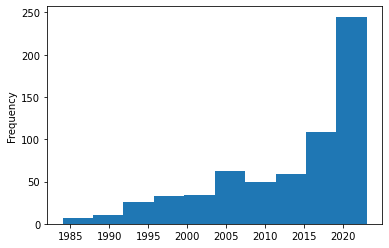

In [174]:
df['year'].plot.hist()
plt.show()

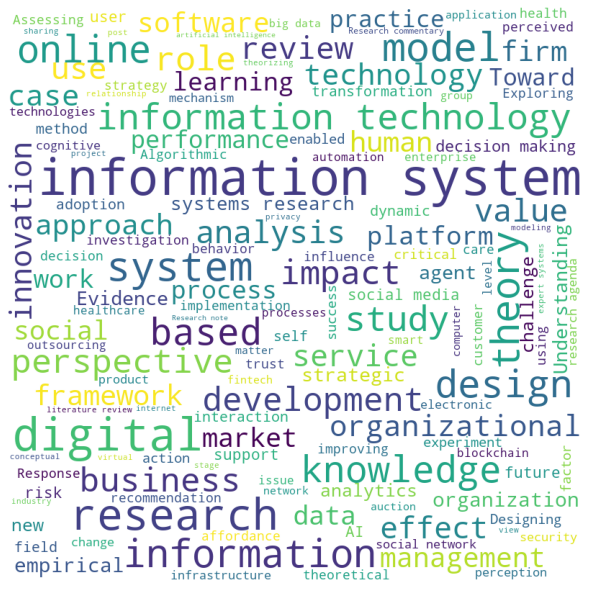

In [175]:
# create a list of words from the dataframe column
words = " ".join(review for review in df["article"])

# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words("english")), 
                min_font_size = 10).generate(words)

# plot wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### 3.2. Screen articles based on title
Select key words that will be included in the search. Only titles that has those keywords will b e included. 

In [176]:
df['article'] = df['article'].apply(lambda x: x.lower())

texts = ['artificial', 'ai ', 'deep learning', 'machine learning', 'data', 'analytics', 'algorithm', 'cognitive']


In [177]:
def code_df (l_df, itext):
    
    df[itext] = df['article'].apply(lambda x: True if itext in x else False)

    df[df[itext]]
    return l_df

for text in texts:
    df = code_df(df, text)

In [178]:
# Specify the columns to check
columns = texts

# Return the rows where at least one of the specified columns has a True value
result = df[df[columns].any(axis=1)]

In [179]:
result

,nr,article,author,year,journal,url,green_text,scraped_from,journal_searched,artificial,ai,deep learning,machine learning,data,analytics,algorithm,cognitive
41,618,reconceptualizing synergy to explain the value...,"I Someh, G Shanks, M Davern",2019,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1177/0...,"I Someh, G Shanks, M Davern of Information Tec...",https://scholar.google.co.za/scholar?start=110...,Journal of Information Technology,False,False,False,False,False,True,False,False
45,629,data science in organizations: conceptualizing...,"JL Cybulski, R Scheepers",2021,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1177/0...,"JL Cybulski, R Scheepers of Information Techno...",https://scholar.google.co.za/scholar?start=20&...,Journal of Information Technology,False,False,False,False,True,False,False,False
46,634,influencing information systems practice: the ...,"M Lacity, L Willcocks",2021,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1177/0...,"M Lacity, L Willcocks of Information Technolog...",https://scholar.google.co.za/scholar?start=10&...,Journal of Information Technology,False,False,False,False,False,False,False,True
48,633,artificial intelligence and the conduct of lit...,"G Wagner, R Lukyanenko",2022,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1177/0...,"G Wagner, R Lukyanenko of Information Technolo...",https://scholar.google.co.za/scholar?start=0&q...,Journal of Information Technology,True,False,False,False,False,False,False,False
54,630,algorithmic pollution: making the invisible vi...,"O Marjanovic, D Cecez",2021,Journal of Information Technology,https://journals.sagepub.com/doi/pdf/10.1177/0...,"O Marjanovic, D CecezKecmanovic Journal of Inf...",https://scholar.google.co.za/scholar?start=70&...,Journal of Information Technology,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,567,a prescriptive analytics framework for optimal...,"E McFowland III, S Gangarapu, R Bapna",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"E McFowland III, S Gangarapu, R Bapna MIS Quar...",https://scholar.google.com/scholar?start=80&q=...,MIS quarterly,False,False,False,False,False,True,False,False
615,569,avoiding an oppressive future of machine learn...,"GC Kane, AG Young, A Majchrzak, S Ransbotham",2021,MIS Quarterly,https://www.researchgate.net/profile/Amber-You...,"GC Kane, AG Young, A Majchrzak, S Ransbotham M...",https://scholar.google.com/scholar?start=20&q=...,MIS quarterly,False,False,False,True,False,False,False,False
625,579,when digital technologies enable and threaten ...,"E Vaast, A Pinsonneault",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"E Vaast, A Pinsonneault MIS Quarterly, 2021 s...",https://scholar.google.com/scholar?start=30&q=...,MIS quarterly,False,False,False,False,True,False,False,False
626,580,coordinating human and machine learning for ef...,"T Sturm, JP Gerlach, L Pumplun, N Mesbah",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"T Sturm, JP Gerlach, L Pumplun, N Mesbah Quart...",https://scholar.google.com/scholar?start=10&q=...,MIS quarterly,False,False,False,True,False,False,False,False


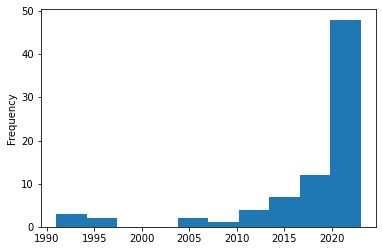

In [180]:
result['year'].plot.hist()
plt.show()

In [181]:
result.describe()

,nr,year
count,79.000000,79.000000
mean,333.620253,2017.493671
std,193.635814,7.313271
min,4.000000,1991.000000
25%,167.500000,2017.000000
50%,365.000000,2020.000000
75%,532.500000,2022.000000
max,634.000000,2023.000000


In [182]:
print(result['article'])

41     reconceptualizing synergy to explain the value...
45     data science in organizations: conceptualizing...
46     influencing information systems practice: the ...
48     artificial intelligence and the conduct of lit...
54     algorithmic pollution: making the invisible vi...
                             ...                        
613    a prescriptive analytics framework for optimal...
615    avoiding an oppressive future of machine learn...
625    when digital technologies enable and threaten ...
626    coordinating human and machine learning for ef...
633    the opm data breach: an investigation of share...
Name: article, Length: 79, dtype: object


In [183]:
for i, row in result.iterrows():
    print(row['article'])

reconceptualizing synergy to explain the value of business analytics systems
data science in organizations: conceptualizing its breakthroughs and blind spots
influencing information systems practice: the action principles approach applied to robotic process and cognitive automation
artificial intelligence and the conduct of literature reviews
algorithmic pollution: making the invisible visible
conceptual data modelling in theory and practice
transforming decision-making processes: a research agenda for understanding the impact of business analytics on organisations
utilizing big data analytics for information systems research: challenges, promises and guidelines
determinants and heterogeneity of switching costs in it outsourcing: estimates from firm-level data
how long can this party last? what the rise and fall of or/ms can teach us about the future of business analytics
algorithmic control and gig workers: a legitimacy perspective of uber drivers
when your data has covid-19: how the 

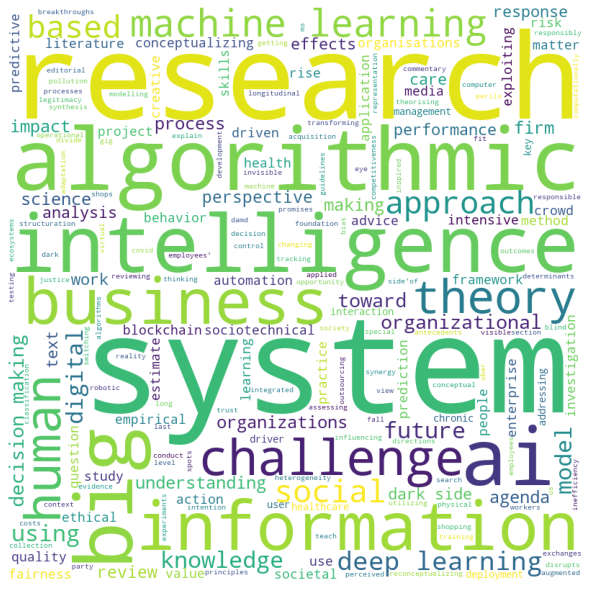

In [184]:
# create a list of words from the dataframe column
words = " ".join(review for review in result["article"])

excluded_words = set(texts)
stopwords = set(stopwords.words("english"))
stopwords.update(excluded_words)

# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

# plot wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [185]:
result.to_excel('data_to_screenfull_text_04022023.xlsx')

#### Number of full text articles assesed for eligibility (level 4):

In [186]:
len(result)

79

These articles are all uploaded into ATLAS.ti and the full text is screened

### 3.5 Number of articles included in qualitative synthesis

In [187]:
df_articles = pd.read_excel('data_to_screenfull_text_result_11022023.xlsx')

df_articles = df_articles[df_articles['full_text_included'] == True]
len(df_articles)

51

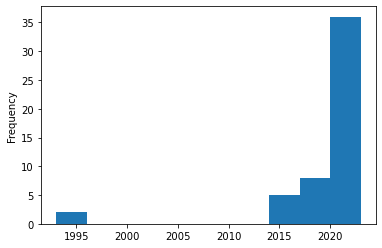

In [188]:
df_articles['year'].plot.hist()
plt.show()

### 3.6 Number of studies included in qualitative synthesis (Meta-aalysis)

In [189]:
df_articles = df_articles[df_articles['year'] >= 1996]
len(df_articles)

49

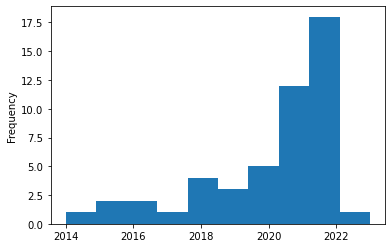

In [191]:
unique_values = df_articles['year'].unique()
unique_values

array([2019, 2021, 2022, 2014, 2023, 2015, 2018, 2017, 2020, 2016],
      dtype=int64)

## 4. Analysis of articles

###  4.1 Article exploration

<li> Show articles and years:

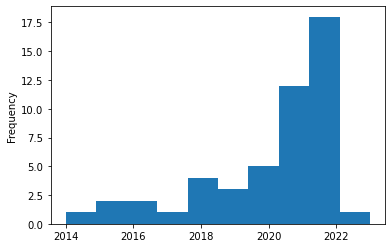

In [202]:
df_articles['year'].plot.hist()
plt.show()

<li> Show articles and Journal:

In [203]:
value_counts = df_articles['journal'].value_counts()
value_counts

European Journal of Information Systems               9
Journal of Management information systems             7
MIS Quarterly                                         7
Information Systems Research                          6
Journal of Strategic Information Systems              5
Journal of the Association for Information Systems    5
Journal of Information Technology                     4
MIS Quarterly Executive                               4
Information Systems Journal                           2
Name: journal, dtype: int64

In [204]:
df_articles[df_articles['journal']=='MIS Quarterly']


,Unnamed: 0,nr,article,author,year,journal,url,green_text,scraped_from,journal_searched,artificial,ai,deep learning,machine learning,data,analytics,algorithm,cognitive,full_text_included
64,584,538,transformational issues of big data and analyt...,"B Baesens, R Bapna, JR Marsden, J Vanthienen",2016,MIS Quarterly,https://www.jstor.org/stable/26629677,"B Baesens, R Bapna, JR Marsden, J Vanthienen M...",https://scholar.google.com/scholar?start=0&q=o...,MIS quarterly,False,False,False,False,True,True,False,False,True
67,593,547,text analytics to support sense-making in soci...,"A Abbas, Y Zhou, S Deng, P Zhang",2018,MIS Quarterly,https://par.nsf.gov/servlets/purl/10064455,"A Abbas, Y Zhou, S Deng, P Zhang MIS Quarterly...",https://scholar.google.com/scholar?start=50&q=...,MIS quarterly,False,False,False,False,False,True,False,False,True
74,613,567,a prescriptive analytics framework for optimal...,"E McFowland III, S Gangarapu, R Bapna",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"E McFowland III, S Gangarapu, R Bapna MIS Quar...",https://scholar.google.com/scholar?start=80&q=...,MIS quarterly,False,False,False,False,False,True,False,False,True
75,615,569,avoiding an oppressive future of machine learn...,"GC Kane, AG Young, A Majchrzak, S Ransbotham",2021,MIS Quarterly,https://www.researchgate.net/profile/Amber-You...,"GC Kane, AG Young, A Majchrzak, S Ransbotham M...",https://scholar.google.com/scholar?start=20&q=...,MIS quarterly,False,False,False,True,False,False,False,False,True
76,625,579,when digital technologies enable and threaten ...,"E Vaast, A Pinsonneault",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"E Vaast, A Pinsonneault MIS Quarterly, 2021 s...",https://scholar.google.com/scholar?start=30&q=...,MIS quarterly,False,False,False,False,True,False,False,False,True
77,626,580,coordinating human and machine learning for ef...,"T Sturm, JP Gerlach, L Pumplun, N Mesbah",2021,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"T Sturm, JP Gerlach, L Pumplun, N Mesbah Quart...",https://scholar.google.com/scholar?start=10&q=...,MIS quarterly,False,False,False,True,False,False,False,False,True
78,633,587,the opm data breach: an investigation of share...,"E Bachura, R Valecha, R Chen, HR Rao",2022,MIS Quarterly,https://search.ebscohost.com/login.aspx?direct...,"E Bachura, R Valecha, R Chen, HR Rao MIS Quart...",https://scholar.google.com/scholar?start=80&q=...,MIS quarterly,False,False,False,False,True,False,False,False,True
